In [10]:
import numpy as np
import os
import csv
import cv2
import numpy as np
import sklearn
from scipy import ndimage
from skimage import io, color, exposure, filters, img_as_ubyte
from skimage.transform import resize
from skimage.util import random_noise
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

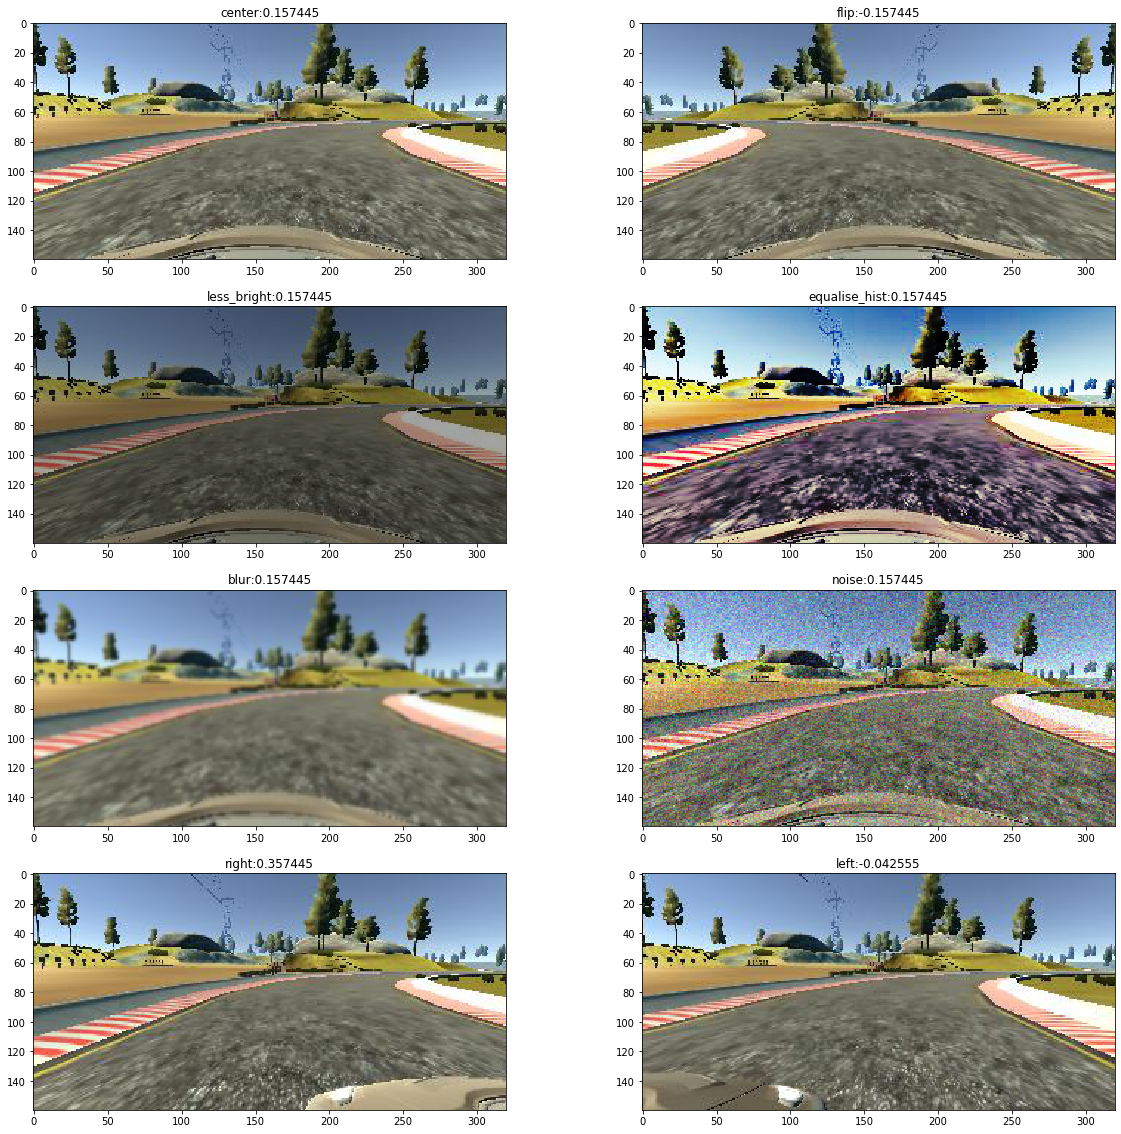

In [47]:
samples = []
# with open('/home/workspace/CarND-Behavioral-Cloning-P3/data/driving_log.csv') as csvfile:
with open('/home/jainayushkumar0/Documents/Courses/SelfDrivingCarNanoDegree/Projects/ProjectBehavioralCloning/CarND-Behavioral-Cloning-P3/data/data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    # Line per line reading the data and appending to samples list
    for line in reader:
        samples.append(line)
                   
# If there is header in csv data, we donot want it to be uploaded into samples list, so we will use samples = samples[1:],
samples=samples[1:]   

# image_datapath = "/home/workspace/CarND-Behavioral-Cloning-P3/data/IMG/"
image_datapath = "/home/jainayushkumar0/Documents/Courses/SelfDrivingCarNanoDegree/Projects/ProjectBehavioralCloning/CarND-Behavioral-Cloning-P3/data/data/IMG/"
correction=0.2
def generate_data(line):
    datatype = {}
    
    source_path=samples[line][0]
    filename=source_path.split('/')[-1]
    current_path=image_datapath+filename
    image=mpimg.imread(current_path)
    angle=float(samples[line][3])
#     plt.imshow(image)
    datatype['center'] = (image, angle)

    image_flip=cv2.flip(image,1) 
    measure_flip=float(angle*-1.0)  
    datatype['flip'] = (image_flip, measure_flip)
#     plt.imshow(image_flip)

    image_bright = color.rgb2hsv(image)
    image_bright[:, :, 2] *= .5 + .4 * np.random.uniform()
    image_bright = img_as_ubyte(color.hsv2rgb(image_bright))
    measure_bright = angle
    datatype['less_bright'] = (image_bright, measure_bright)
#     plt.imshow(image_bright)
    
    image_hist = np.copy(image)
    for channel in range(image_hist.shape[2]):
        image_hist[:, :, channel] = exposure.equalize_hist(image_hist[:, :, channel]) * 255    
    measure_hist = angle
    datatype['equalise_hist'] = (image_hist, measure_hist)
#     plt.imshow(image_hist)
    
    image_blur = img_as_ubyte(np.clip(filters.gaussian(image, multichannel=True), -1, 1))
    measure_blur = angle
    datatype['blur'] = (image_blur, measure_blur)
#     plt.imshow(image_blur)
    
    image_noise = img_as_ubyte(random_noise(image, mode='gaussian'))
    measure_noise = angle
    datatype['noise'] = (image_noise, measure_noise)
#     plt.imshow(image_noise)
    
    source_path_right=samples[line][1]
    filename=source_path_right.split('/')[-1]
    current_path_right=image_datapath+filename
    image_right=mpimg.imread(current_path_right)
    measure_right=float(samples[line][3])+correction 
    datatype['right'] = (image_right, measure_right)
#     plt.imshow(image_right)
    
    source_path_left=samples[line][2]
    filename=source_path_left.split('/')[-1]
    current_path_left=image_datapath+filename
    image_left=mpimg.imread(current_path_left)
    measure_left=float(samples[line][3])-correction
    datatype['left'] = (image_left, measure_left)
#     plt.imshow(image_left)
    
    return datatype

def plot_data(datatype):
    col = 2
    row = len(datatype) // 2
    f, axarr = plt.subplots(row, col, figsize=(20, 20))
    for idx, (name, (img, ang)) in enumerate(datatype.items()):
        axarr[idx//col, idx%col].set_title('{}:{:f}'.format(name, ang))
        axarr[idx//col, idx%col].imshow(img)
    plt.show()
    
datatype = generate_data(1495)
plot_data(datatype)